<a href="https://colab.research.google.com/github/chinweeee/Spam-Message-Classification-SVM_RandomForest-/blob/main/Spam_Message_Classification(SVM_RandomForest).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1) Data Processing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('spam.tsv', sep='\t')

In [ ]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
df.isna().sum() #there are no missing values in the data

label      0
message    0
length     0
punct      0
dtype: int64

In [ ]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [ ]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [ ]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [ ]:
percent_count = df['label'].value_counts()/len(df)
percent_count*100

label
ham     86.593683
spam    13.406317
Name: count, dtype: float64

In [ ]:
#Need to make the dataset balanced because there are more "ham" records than "spam" records

ham = df[df['label']=='ham']
spam = df[df['label']=='spam']

ham.shape, spam.shape

((4825, 4), (747, 4))

In [ ]:
#so here i only want the same count of records in spam in ham
ham = ham.sample(spam.shape[0])

In [ ]:
data = pd.concat([ham, spam], ignore_index=True)
data.shape

(1494, 4)

In [ ]:
data['label'].value_counts()

label
ham     747
spam    747
Name: count, dtype: int64

In [ ]:
data.head()

,label,message,length,punct
0,ham,Still in customer place,23,0
1,ham,Havent stuck at orchard in my dad's car. Going...,91,5
2,ham,"No my blankets are sufficient, thx",34,1
3,ham,I think that tantrum's finished so yeah I'll b...,64,2
4,ham,Was the actual exam harder than NBME,36,0


####Visualizing the data

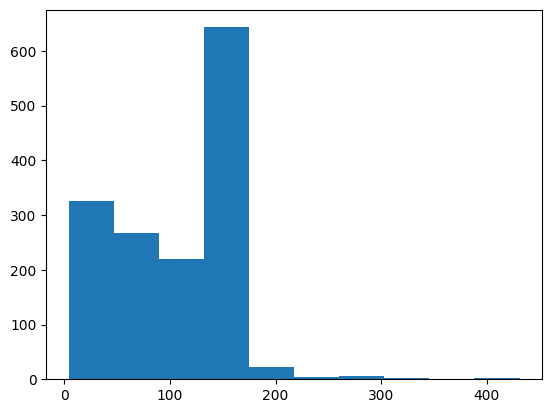

In [ ]:
plt.hist(data['length']);

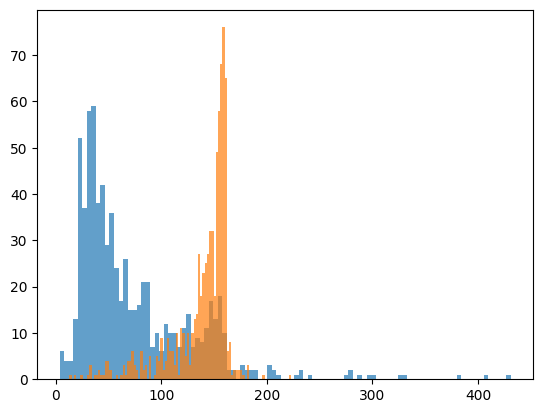

In [ ]:
plt.hist(data[data['label']=='ham']['length'], bins=100, alpha=0.7); #visualizing the length of only ham labels
plt.hist(data[data['label']=='spam']['length'], bins=100, alpha=0.7);
plt.show()
#I can deduce that most of the length of ham messages are between the lengths of 0-170

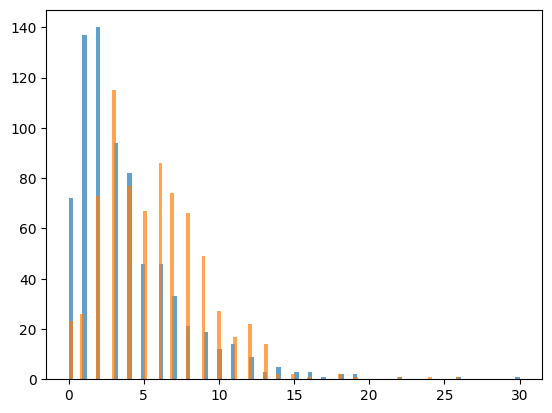

In [ ]:
plt.hist(data[data['label']=='ham']['punct'], bins=100, alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'], bins=100, alpha=0.7)
plt.show()

## Train and Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data["message"], data["label"], test_size=0.3, random_state=0, shuffle=True)

In [ ]:
(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

((1045,), (449,), (1045,), (449,))

## 2) Building the Model (Random Forest)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

In [ ]:
classifier = Pipeline([("tfidf", TfidfVectorizer()), ("classifier", RandomForestClassifier(n_estimators=100))])

In [ ]:
classifier.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

## Evaluate and Predict the Model

In [ ]:
y_pred = classifier.predict(x_test)
y_test, y_pred

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 824     spam
 822     spam
 644      ham
 1034    spam
 1356    spam
 Name: label, Length: 449, dtype: object,
 array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
        'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
        'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam'

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, accuracy_score, confusion_matrix

In [ ]:
accuracy_score(y_test, y_pred)

0.955456570155902

In [ ]:
confusion_matrix(y_test, y_pred)

array([[227,   0],
       [ 20, 202]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.92      1.00      0.96       227
        spam       1.00      0.91      0.95       222

    accuracy                           0.96       449
   macro avg       0.96      0.95      0.96       449
weighted avg       0.96      0.96      0.96       449



## Another Model (SVM)
- Building the Model

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = Pipeline([("tfidf", TfidfVectorizer()), ("classifier", SVC(C=100, gamma="auto"))])

- Predicting the results (SVM)

In [ ]:
svm.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

In [ ]:
y_pred = svm.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9510022271714922

In [ ]:
confusion_matrix(y_test, y_pred)

array([[223,   4],
       [ 18, 204]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.93      0.98      0.95       227
        spam       0.98      0.92      0.95       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



## Now i will be predicting the model on sample data

In [ ]:
test1 = ['Hello, you are learning NLP']
test2 = ['Hopre you are doing good and learning new things !']
test3 = ['"Congratulations! You''ve won a $1000 Walmart gift card. Click here to claim now: www.fakeurl.com']

In [ ]:
# Using Random Forest Model
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))

['ham']
['ham']
['spam']


In [ ]:
# Using the SVM
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['ham']
['spam']
